### Trabajo Practico de laboratorio 1

##### Franco Ruggiero

> Filtro Chebyshev (A)

| ⍺Max [dB] | ⍺mín [dB] | fp [KHz] | fs [KHz] |
|--|--|--|--|
| 0.5 | 16 | 1.5 | 4.5 |

* #### *Obtengo $\epsilon^2$ y n*

>  <center><img src="TPLAB1_1.jpg" style="width:600px"> <center>

In [4]:
import numpy as np

alpha_max = 0.5

eeps = 10**(alpha_max/10)-1  # eeps = eps al cuadrado
eps = np.sqrt(eeps)

print('eeps = ', eeps)
print('eps  = ', eps ) 
print('')

ws = 3

for n in range(2,4):
    alpha_min_c = 10 * np.log10(1 + eeps * np.cosh(n * np.arccosh(ws))**2)
    print('n = {:d}    ---    alpha_min_cheby {:f}'. format(n, alpha_min_c))

n = 3

eeps =  0.12201845430196334
eps  =  0.34931140018894796

n = 2    ---    alpha_min_cheby 15.594677
n = 3    ---    alpha_min_cheby 30.780589


* Obtengo la función transferencia en el dominio de Laplace 

>  <center><img src="TPLAB1_2.jpg" style="width:600px"> <center>
>  <center><img src="TPLAB1_3.jpg" style="width:600px"> <center>
>  <center><img src="TPLAB1_4.jpg" style="width:600px"> <center>
>  <center><img src="TPLAB1_5.jpg" style="width:600px"> <center>

In [5]:
from pytc2.general import Chebyshev_polynomials, s, w, print_subtitle
import sympy as sp

chebn_expr = Chebyshev_polynomials(n)

# Tch_jw = (1/eeps) / (1/eeps + chebn_expr**2)
Tch_jw = -(1/(eeps*16)) / (-(1/eeps + chebn_expr**2)/16) #divido por el coeficiente de grado 6 para que quede en forma monica
j = sp.I

Tch_s = Tch_jw.subs(w, s/j)

display(sp.expand(Tch_s))

-0.512217601489436/(s**6 + 3*s**4/2 + 9*s**2/16 - 0.512217601489436)

In [6]:
from pytc2.sistemas_lineales import analyze_sys, pretty_print_lti, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_latex, print_subtitle
import scipy.signal as sig

num_Tch_s = np.array([(-1)/(eeps*16)])
den_Tch_s = np.array([ 1 , 0 , 3/2 , 0 , 9/16 , 0 , -1/(eeps*16) ]) 

Taux = sig.TransferFunction(num_Tch_s , den_Tch_s)
pretty_print_lti(Taux)

print("")

# Obtengo las raices
roots_den_Tch_s = np.roots(den_Tch_s)

# obtengo las raices de T(s) filtrando las de T(-s)
roots_den_T_s = roots_den_Tch_s[np.real(roots_den_Tch_s) < 0]
print(roots_den_T_s)


<IPython.core.display.Math object>


[-0.31322824+1.02192749j -0.31322824-1.02192749j -0.62645649+0.j        ]


In [7]:
# corroboro los polos de la T(s)

den_T_s = np.array([ 1 , 0 , 3/4 , 1/(eps*4) ])
roots_den_Ts = np.roots(den_T_s)

print(roots_den_Ts)

print('')


# verificacion con cheblap
z,p,k = sig.cheb1ap(n, alpha_max)
num_cheb, den_cheb = sig.zpk2tf(z,p,k)

sos_cheb = tf2sos_analog(num_cheb, den_cheb)

pretty_print_SOS(sos_cheb, mode='omegayq')
print('')

[ 0.31322824+1.02192749j  0.31322824-1.02192749j -0.62645649+0.j        ]



<IPython.core.display.Math object>

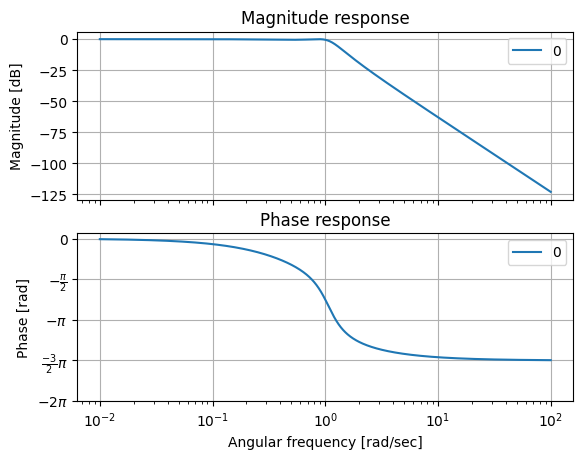

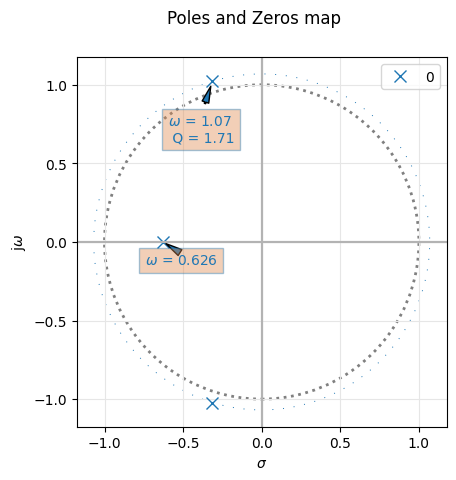

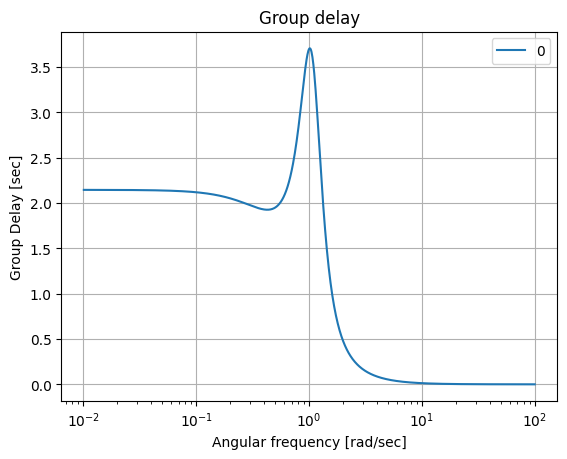

In [9]:
#%matplotlib qt
%matplotlib inline
    
from pytc2.sistemas_lineales import analyze_sys, bodePlot, pzmap

all_sys = []

all_sys.append( sig.TransferFunction(num_cheb, den_cheb) )

figaxes = analyze_sys( all_sys )

* Sintetice los valores de los componentes externos del circuito UAF42

>  <center><img src="TPLAB1_6.jpg" style="width:600px"> <center>
>  <center><img src="TPLAB1_7.jpg" style="width:600px"> <center>

>  <center><img src="Draft_TPLAB1_miDesign.png" style="width:800px"> <center>
>  <center><img src="Simulacion_TPLAB1_myDesign.png" style="width:800px"> <center>
>  <center><img src="simulacion_groupDelay_TPLAB1_myDesign.png" style="width:800px"> <center>

* Simulando con los valores exactos de las resistencias:

>  <center><img src="simulacion_valoresExcactos_TPLAB1_myDesign.png" style="width:900px"> <center>
>  <center><img src="simulacion_valoresExcactos_groupDelay_TPLAB1_myDesign.png" style="width:900px"> <center>


##  Simulacion en el laboratorio:

Esquema de conexion:
  <center><img src="TESTEO.png" style="width:600px ; height:350px"> <center>

#### Finalmente el circuito utilizado para la simulacion es el siguiente:
  <center><img src="Draft_TPLab1_final.png" style="width:800px ; height:350px"> <center>
  <center><img src="modulo_Draft_Final.png" style="width:900px ; height:400px"> <center>
  <center><img src="fase_Draft_Final.png" style="width:900px ; height:400px"> <center>

### Esquematico y PCB:
  <center><img src="circuito_esquematico.jpeg" style="width:600px ; height:400px"> <center>
  <center><img src="cirtuito_impreso.jpeg" style="width:500px ; height:320px"> <center>
  <center><img src="PLAQUETA.jpg" style="width:500px ; height:320px"> <center>


### Medicion con osciloscopio:
<center><img src="IMG2.jpg" style="width:450px ; height:500px"> <center>
    <center><img src="IMG4.jpg" style="width:450px ; height:500px"> <center>
    <center><img src="IMG6.jpg" style="width:450px ; height:500px"> <center>
    <center><img src="IMG7.jpg" style="width:450px ; height:500px"> <center>
    <center><img src="IMG8.jpg" style="width:450px ; height:500px"> <center>

* Los siguientes resultados, se obtuvieron al seleccionar varias frecuencias de prueba, y medir sus respectivas ganancias y retardos (con cruce por cero o diferencia de tiempo entre los picos), para luego graficar los resultados en escala logaritmica.

<center><img src="Tablas1.jpg" style="width:750px ; height:600px"> <center>

*En los graficos se puede ver un punto verde y negro, los cuales representan las frecuencias de corte y stop respectivamente. Se puede observar que si tomamos en cuenta la tolerancia de los componentes, la curva obtenida se aproxima a los valores simulados.*

<center><img src="Tablas2.jpg" style="width:750px ; height:500px"> <center>
<center><img src="Tablas3.jpg" style="width:750px ; height:500px"> <center>

### Medicion con Analizador de audio (U8903A)

<center><img src="IMG1.jpg" style="width:450px ; height:500px"> <center>
<center><img src="IMG3.jpg" style="width:450px ; height:500px"> <center>

 Con el analizador del audio, pudimos hacer un barrido de frecuencia que permitia una mayor cantidad de muestras en menor tiempo.
Las tablas que muestran son: 
- Frecuencia vs. Frecuencia: permite verificar si las senales de entrada y salida coinciden, garantizando que no haya distorsión de frecuencia.
- Fase vs. Frecuencia: asegura que las señales a diferentes frecuencias estén alineadas temporalmente, evitando problemas de desincronización y manteniendo la claridad y coherencia del audio. (En esta misma se presenta un comportamiento que a frecuencias altas la fase varia de forma abrupta, puede ser resultado de la complejidad del sistema y su respuesta a las frecuencias medidas. Estos patrones pueden indicar la presencia de resonancias, efectos de retroalimentación, o comportamientos de fase no lineales.
- VAC vs. Frecuencia: verifica la uniformidad en la respuesta en amplitud, asegurando que el sistema no amplifique ni atenúe frecuencias de manera desigual.


<center><img src="Tablas4.jpg" style="width:900px ; height:1000px"> <center>
<center><img src="Tablas5.jpg" style="width:700px ; height:550px"> <center>
<center><img src="Tablas6.jpg" style="width:700px ; height:550px"> <center>
<center><img src="Tablas7.jpg" style="width:700px ; height:550px"> <center>
<center><img src="Tablas8.jpg" style="width:700px ; height:550px"> <center>

#### Conclusiones

Con este trabajo se logro poner en funcionamiento un filtro Chebyshev pasabajos que a pesar, de que algunos valores medidos no coincidieron exactamente con los esperados teóricamente (variacion atribuible a las tolerancias de los componentes y las variaciones en la construcción), los resultados obtenidos están dentro de un rango aceptable y se aproximan a las especificaciones de diseño.